# Análise exploratória de casos de Dengue notificado pelo SUS

Neste tutorial vamos explorar como começar a entender a descrição de casos do sis tema de notificação de agravos do SUS, o SINAN. Estes dados são bastante ricos e a [documentação](www.sgc.goias.gov.br/upload/arquivos/2013-08/dengue2.pdf) sobre o significado de cada uma das variáveis pode ser encontrada [aqui](www.sgc.goias.gov.br/upload/arquivos/2013-08/dengue2.pdf).

In [27]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Primeiro vamos começar pelo carregamento dos dados a partir do site do InfoDengue. Como o dado está no formato CSV, nós vamos utilizar a biblioteca pandas para carregar os dados diretamente da web, em um Dataframe.

In [50]:
casos = pd.read_csv('https://info.dengue.mat.br/dumps/dengue_geo_2015-16.csv', index_col=0)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (56,66,103,119) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
casos.head()

,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,...,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H,CS_FLXRET,FLXRECEBI,IDENT_MICR,MIGRADO_W,latitude,longitude
0,4219621,2,A90,2015-09-17,37,2015,33,330455,NaN,2296608.0,...,NaN,NaN,NaN,NaN,1,NaN,4.0,NaN,-22.925318,-43.388889
1,4578897,2,A90,2015-05-15,19,2015,33,330455,NaN,7722494.0,...,NaN,NaN,NaN,NaN,0,NaN,4.0,NaN,-22.872878,-43.425393
2,2309233,2,A90,2015-08-14,32,2015,33,330455,NaN,2291266.0,...,NaN,NaN,NaN,NaN,1,NaN,4.0,NaN,-22.826738,-43.329702
3,7605238,2,A90,2015-08-18,33,2015,33,330455,NaN,3134822.0,...,NaN,NaN,NaN,NaN,0,NaN,4.0,NaN,-22.879648,-43.339151
4,7605239,2,A90,2015-08-18,33,2015,33,330455,NaN,3134822.0,...,NaN,NaN,NaN,NaN,1,NaN,4.0,NaN,-22.814463,-43.380845


Estes dados correspondem a todos os casos de dengue notificado ao SUS durante um período. Neste caso de 2015 a 2016. Para podermos tratar adequadamente estes dados para fins de visualização ou análise precisamos corrigir os tipos das colunas. Por exemplo vamos converter as datas.

In [52]:
casos.DT_NOTIFIC = pd.to_datetime(casos.DT_NOTIFIC)

Para poder organizar os dados temporalmente, é útil indexar a tabela por alguma variável temporal

In [53]:
casos = casos.set_index('DT_NOTIFIC')

Agora podemos plotar o número de casos por semana de dengue na cidade do Rio de Janeiro.

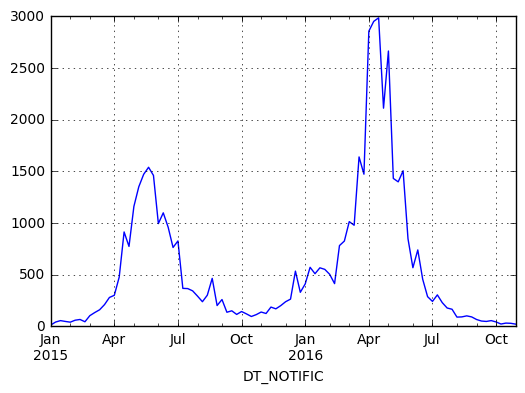

In [54]:
casos.ID_AGRAVO.resample('1W').count().plot(grid=True);

Suponhamos agora que desejamos visualizar em um mapa os casos que ocorreram, por exemplo entre janeiro e março de 2015

In [48]:
mapa  = folium.Map(location=[-22.914921, -43.194043])
casos_janeiro = casos.ix['2015-01-01':'2015-03-31']
#popups = casos_janeiro.CS_SEXO.values
#mapa.add_children(MarkerCluster(locations=casos_janeiro[['latitude','longitude']].values.tolist(), popups=popups))
mapa